In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import os
import ast
from sklearn.preprocessing import MinMaxScaler


path = "/Users/sequel/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/versions/1"
os.chdir(path)
# Load data
tracks_df = pd.read_csv('tracks.csv')
artists_df = pd.read_csv('artists.csv')
tracks_head_path = '/Users/sequel/Library/Mobile Documents/com~apple~CloudDocs/Documents/cityu-dg/sem2/cs5481-data/assign/ass2/track_head.csv'
artists_head_path = '/Users/sequel/Library/Mobile Documents/com~apple~CloudDocs/Documents/cityu-dg/sem2/cs5481-data/assign/ass2/artists_head.csv'
tracks_df.head().to_csv(tracks_head_path, index=False)
artists_df.head().to_csv(artists_head_path, index=False)
print(len(artists_df))

1162095


In [96]:
popularity = np.array([[85.], [76.67]])
print(popularity.shape)

(2, 1)


['dance pop', 'pop', 'rock', 'electro house', 'classical performance']
genre_artists len: 572
numbers of tracks realted to current genre: 12119
genre_artists len: 568
numbers of tracks realted to current genre: 11908
genre_artists len: 564
numbers of tracks realted to current genre: 32026
genre_artists len: 559
numbers of tracks realted to current genre: 1994
genre_artists len: 502
numbers of tracks realted to current genre: 13808


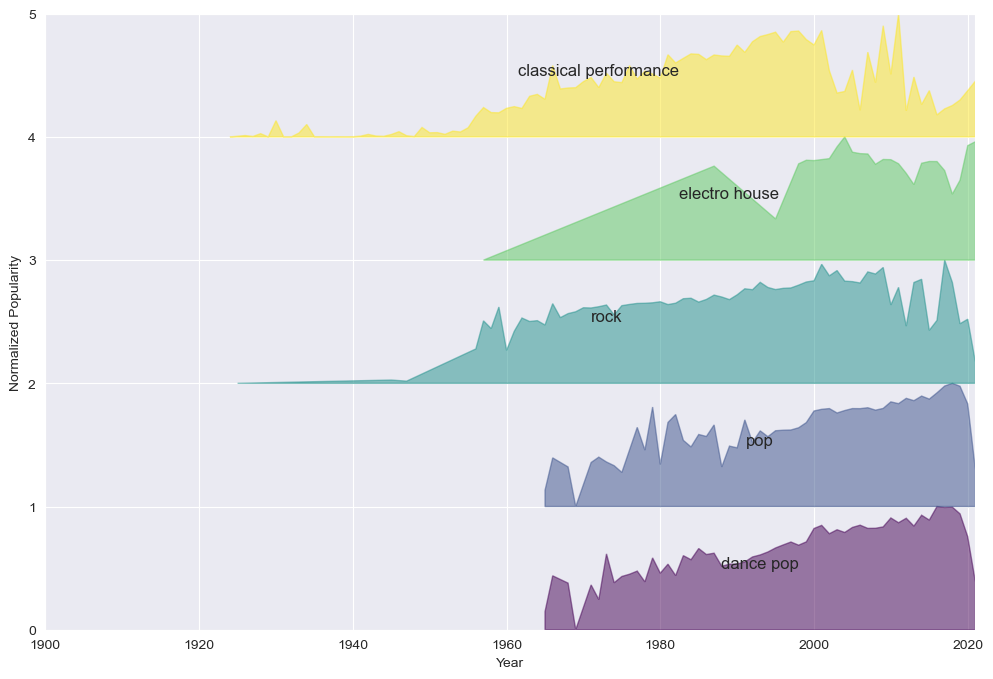

In [98]:
def is_genre_track(artist_ids, genre_artist_ids):
    # 检查曲目的艺术家列表中是否有艺术家属于当前流派
    return any(artist_id in genre_artist_ids for artist_id in artist_ids)

def visualize_genre_evolution(tracks_df, artists_df):
    # Convert genres and dates
    artists_df['genres_list'] = artists_df['genres'].apply(eval)
    artists_df = artists_df[artists_df['genres_list'].apply(lambda x: len(x) > 0)]
    tracks_df['year'] = pd.to_datetime(tracks_df['release_date'], format='mixed').dt.year
    # Create a dictionary to count genres
    genre_count = {}
    for genres in artists_df['genres_list']:
        for genre in genres:
            genre_count[genre] = genre_count.get(genre, 0) + 1
    
    # Get top 5 genres
    top_genres = sorted(genre_count, key=genre_count.get, reverse=True)[:5]
    
    print(top_genres)
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres)))
    
    # Initialize scaler for normalization
    scaler = MinMaxScaler()  
    base_y = 0
    for idx, genre in enumerate(top_genres):
        #1. 过滤出特定gentres对应的artist
        genre_artists = artists_df[artists_df['genres_list'].apply(lambda x: genre in x)]
        print("genre_artists len:",len(genre_artists))
    #2. 根据1中特定的artist 过滤出tracks
        # 2.1 转换艺术家ID列表,id_artists是字符串类型的列表，需要转换为列表类型
        tracks_df['id_artists_list'] = tracks_df['id_artists'].apply(eval)
        # 2.2 根据当前流派曲目对应-艺术家列表-筛选出这些流派的曲目，
        # (gentre, atristids) x (atristid, track_id)-> (gentre, track_id)
        genre_tracks = tracks_df[
            tracks_df['id_artists_list'].apply(
                lambda x: is_genre_track(x, genre_artists['id'].values)
            )
        ]
        print("numbers of tracks realted to current genre:", len(genre_tracks))
    #3. 计算2中的tracks的popularity的平均值
        genre_by_year = genre_tracks.groupby('year')['popularity'].mean().to_dict()

        # Skip if no data
        if not genre_by_year:
            print("This gentre relate to empty tracks, somthing went wrong!")
            continue
    #4. 对3中的popularity进行归一化处理
    #5. 绘制多边形
    #6. 绘制标签
        # Normalize values between 0-1
        years = list(genre_by_year.keys())
        popularity = np.array(list(genre_by_year.values())).reshape(-1, 1)
        normalized_popularity = scaler.fit_transform(popularity).flatten()
        
        # Create polygon points
        points = list(zip(years, normalized_popularity + base_y))
        points = [(years[0], base_y)] + points + [(years[-1], base_y)]
        
        # Add polygon to plot
        polygon = plt.Polygon(points, color=colors[idx], alpha=0.5)
        ax.add_patch(polygon)
        
        # Add label
        mid_year = (years[0] + years[-1]) // 2
        ax.text(mid_year, base_y + 0.5, genre, fontsize=12, ha='center')
        
        base_y += 1
        
    # Set plot properties
    ax.set_xlim(min(tracks_df['year']), max(tracks_df['year']))
    ax.set_ylim(0, len(top_genres))
    plt.xlabel('Year')
    plt.ylabel('Normalized Popularity')
    return fig

# Create visualization
genre_fig = visualize_genre_evolution(tracks_df, artists_df)
plt.show()


### Data Processing:
- Filter artists by genre
- Calculate yearly popularity
- Normalize values between 0-1
### Polygon Creation:
- Points need to form a closed shape
- Include base points
- Use proper ordering
### Key Concepts:
- Genre stacking (base_y)
- Time progression (x-axis)
- Popularity representation (height)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


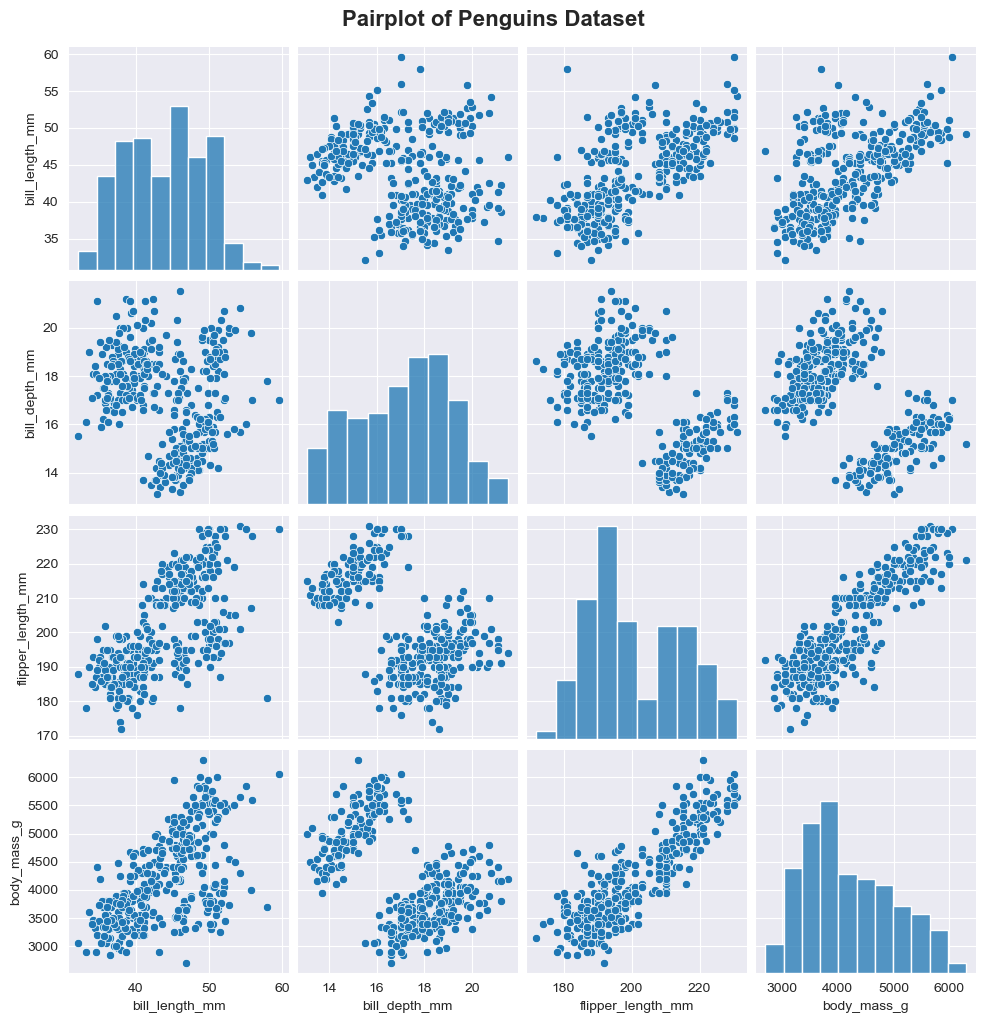

In [ ]:
# 设置 Seaborn 风格
sns.set_style("darkgrid")
#绘制 pairplot
sns.pairplot(
    penguins
)
# 设置标题
plt.suptitle("Pairplot of Penguins Dataset", fontsize=16, fontweight='bold', y=1.02)
# 使用 plt.xlabel 和 plt.ylabel 来设置标签
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# 图表
plt.show()